In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import punkt
from nltk.corpus.reader import wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
# Dataframe
path_df = "Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [4]:
# Fixed Parameters 
random_state = 8


The training accuracy for MultinomialNB is: 
0.9518773135906927
The test accuracy for MultinomialNB is: 
0.9550898203592815
Classification report for MultinomialNB
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        80
           1       0.97      0.96      0.96        67
           2       0.95      0.93      0.94        57
           3       0.99      0.99      0.99        69
           4       0.92      0.90      0.91        61

    accuracy                           0.96       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.96      0.96      0.95       334



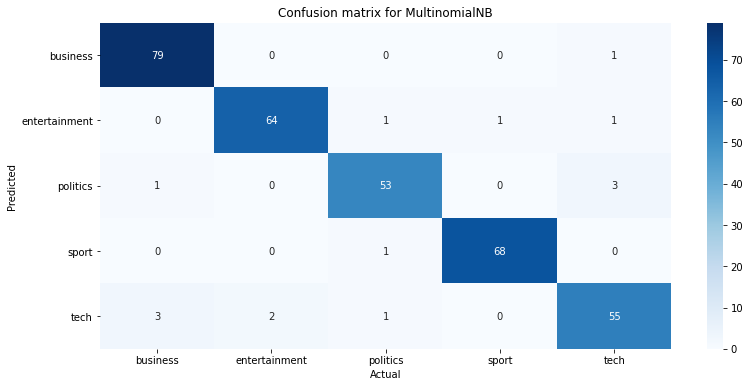

In [5]:
# Multinimial Naive Bayes Model
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
# Training accuracy
print("The training accuracy for MultinomialNB is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Test accuracy
print("The test accuracy for MultinomialNB is: ")
print(accuracy_score(labels_test, mnbc_pred))
# Classification report
print("Classification report for MultinomialNB")
print(classification_report(labels_test,mnbc_pred))
# Confusion Matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix for MultinomialNB')
plt.show()
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models = pd.DataFrame(d, index=[1])
with open('Pickles/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('Pickles/df_models.pickle', 'wb') as output:
    pickle.dump(df_models, output)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  7.2min finished


The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9471092328461582
Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  5.3min finished


The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.9498666666666667
The training accuracy for Random Forest Classifier is: 
1.0
The test accuracy for Random Forest Classifier is: 
0.9520958083832335
Classification report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        80
           1       0.94      0.96      0.95        67
           2       0.92      0.95      0.93        57
           3       0.99      0.99      0.99        69
           4       0.93      0.93      0.93        61

    accuracy                           0.95       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334



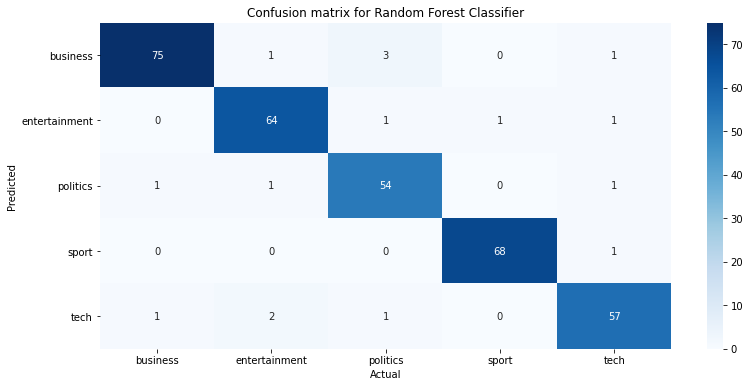

,Model,Training Set Accuracy,Test Set Accuracy
1,Multinomial Naïve Bayes,0.951877,0.955090
2,Random Forest,1.000000,0.952096


In [6]:
# Random Forest Classifier Model
# Random grid search Cross Validation Parameters
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)                                        # random state change

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)                                 # random state change

# Fit the random search model
random_search.fit(features_train, labels_train)
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)
randomsearch = random_search.best_score_


# Grid Search Cross Validation

# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)                           # random state change

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)     # random state change

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
gridsearch = grid_search.best_score_

if gridsearch < randomsearch:
    best_rfc = random_search.best_estimator_
else:
    best_rfc = grid_search.best_estimator_
    
# Model Training
best_rfc.fit(features_train, labels_train)
rfc_pred = best_rfc.predict(features_test)
# Training accuracy
print("The training accuracy for Random Forest Classifier is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))
# Test accuracy
print("The test accuracy for Random Forest Classifier is: ")
print(accuracy_score(labels_test, rfc_pred))
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_model = pd.DataFrame(d, index=[2])
df_models = df_models.append(df_model)
with open('Pickles/best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('Pickles/df_models.pickle', 'wb') as output:
    pickle.dump(df_models, output)
df_models

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.5min finished


The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.927019344451991
Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:  5.8min finished


The best hyperparameters from Grid Search are:
{'C': 0.1, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.944
The training accuracy is: 
0.9640401903754627
The test accuracy is: 
0.9491017964071856
Classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        80
           1       0.97      0.97      0.97        67
           2       0.95      0.93      0.94        57
           3       0.99      0.99      0.99        69
           4       0.95      0.87      0.91        61

    accuracy                           0.95       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334



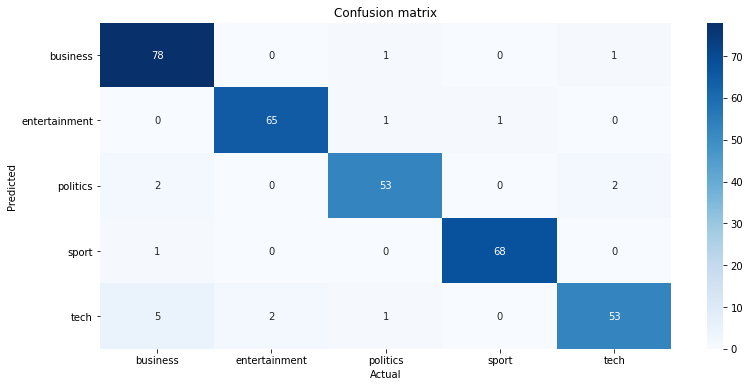

In [7]:
# SIMPLE VECTOR MACHINE MODEL

# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

# First create the base model to tune
svc = svm.SVC(random_state=random_state)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=random_state)

# Fit the random search model
random_search.fit(features_train, labels_train)
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)
randomsearch = random_search.best_score_

# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=random_state)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = random_state)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
gridsearch = grid_search.best_score_

if gridsearch < randomsearch:
    best_svc = random_search.best_estimator_
else:
    best_svc = grid_search.best_estimator_
    
best_svc.fit(features_train, labels_train)
svc_pred = best_svc.predict(features_test)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))
# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()
best_svc.fit(features_train, labels_train)
accuracy_score(labels_test, best_svc.predict(features_test))
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_svc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_model = pd.DataFrame(d, index=[3])
df_models = df_models.append(df_model)
df_models
with open('Pickles/best_svc.pickle', 'wb') as output:
    pickle.dump(best_svc, output)
    
with open('Pickles/df_models.pickle', 'wb') as output:
    pickle.dump(df_model, output)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.2s finished


The best hyperparameters from Random Search are:
{'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': None, 'C': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.9545166402535656
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    7.0s finished


The best hyperparameters from Grid Search are:
{'C': 0.8666666666666667, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9621333333333334
The training accuracy is: 
0.9767318878900053
The test accuracy is: 
0.9520958083832335
Classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.98      0.97      0.98        67
           2       0.92      0.95      0.93        57
           3       0.97      0.99      0.98        69
           4       0.95      0.92      0.93        61

    accuracy                           0.95       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334



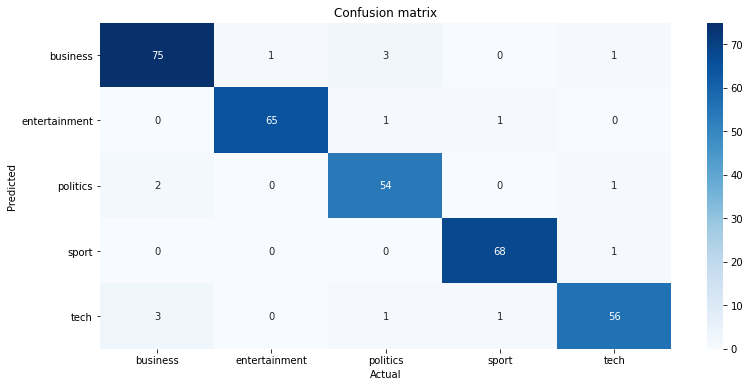

In [8]:
# LOGISTIC REGRESSION MODEL

# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# First create the base model to tune
lrc = LogisticRegression(random_state=random_state)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=random_state)

# Fit the random search model
random_search.fit(features_train, labels_train)
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)
randomsearch = random_search.best_score_

# Create the parameter grid based on the results of random search 
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['sag']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=random_state)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = random_state)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
gridsearch = grid_search.best_score_

if gridsearch < randomsearch:
    best_lrc = random_search.best_estimator_
else:
    best_lrc = grid_search.best_estimator_
    
best_lrc.fit(features_train, labels_train)
lrc_pred = best_lrc.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_lrc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, lrc_pred))
# Classification report
print("Classification report")
print(classification_report(labels_test,lrc_pred))

aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, lrc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_lrc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, lrc_pred)
}

df_model = pd.DataFrame(d, index=[4])
df_models = df_models.append(df_model)
df_models
with open('Pickles/best_lrc.pickle', 'wb') as output:
    pickle.dump(best_lrc, output)
    
with open('Pickles/df_models.pickle', 'wb') as output:
    pickle.dump(df_models, output)

In [9]:
df_models

,Model,Training Set Accuracy,Test Set Accuracy
1,Multinomial Naïve Bayes,0.951877,0.955090
2,Random Forest,1.000000,0.952096
3,SVM,0.964040,0.949102
4,Logistic Regression,0.976732,0.952096


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best hyperparameters from Grid Search are:
{'n_neighbors': 6}

The mean accuracy of a model with these hyperparameters is:
0.9461333333333334
Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   12.9s finished


The best hyperparameters from Grid Search are:
{'n_neighbors': 6}

The mean accuracy of a model with these hyperparameters is:
0.9461333333333334
The training accuracy is: 
0.960867265996827
The test accuracy is: 
0.9461077844311377
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        80
           1       1.00      0.97      0.98        67
           2       0.88      0.93      0.91        57
           3       0.99      0.97      0.98        69
           4       0.92      0.95      0.94        61

    accuracy                           0.95       334
   macro avg       0.95      0.95      0.95       334
weighted avg       0.95      0.95      0.95       334



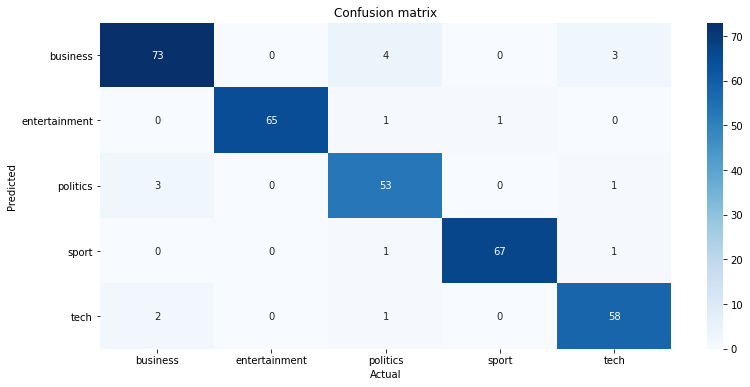

In [10]:
# K NEAREST NEIGHBOR CLASSIFIER MODEL

# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = random_state)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc,param_grid=param_grid,scoring='accuracy',cv=cv_sets,verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
gridsearch1 = grid_search.best_score_
gridsearch1model= grid_search.best_estimator_

                     
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = random_state)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)
                       
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
gridsearch2 = grid_search.best_score_
gridsearch2model = grid_search.best_estimator_
if gridsearch1 > gridsearch2:
    best_knnc = gridsearch1model
else:
    best_knnc = gridsearch2model
        
best_knnc.fit(features_train, labels_train)
knnc_pred = best_knnc.predict(features_test)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()
                       
d = {
     'Model': 'KNN Classifier',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_model = pd.DataFrame(d, index=[5])
df_models = df_models.append(df_model)
df_models
with open('Pickles/best_knnc.pickle', 'wb') as output:
    pickle.dump(best_knnc, output)
    
with open('Pickles/df_models.pickle', 'wb') as output:
    pickle.dump(df_models, output)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 56.0min finished


The best hyperparameters from Random Search are:
{'subsample': 1.0, 'n_estimators': 800, 'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'learning_rate': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.9529343697331019
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.2min finished


The best hyperparameters from Grid Search are:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 800, 'subsample': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.9498666666666667
The training accuracy is: 
1.0
The test accuracy is: 
0.9610778443113772
Classification report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        80
           1       0.96      0.97      0.96        67
           2       0.96      0.95      0.96        57
           3       1.00      0.99      0.99        69
           4       0.89      0.95      0.92        61

    accuracy                           0.96       334
   macro avg       0.96      0.96      0.96       334
weighted avg       0.96      0.96      0.96       334



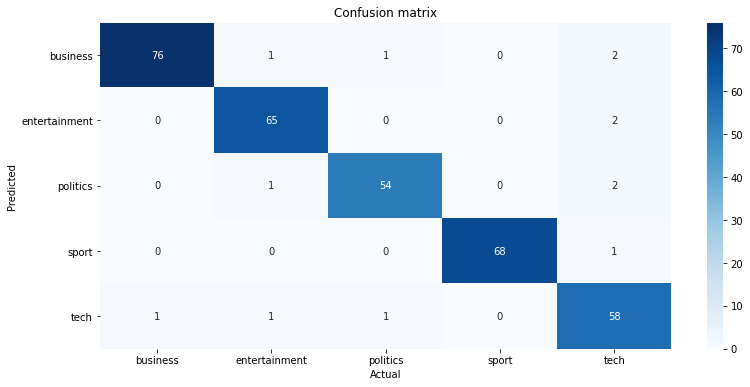

In [11]:
# GRADIENT BOOSTING CLASSIFIER MODEL
# n_estimators
n_estimators = [200, 800]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [10, 40]
max_depth.append(None)

# min_samples_split
min_samples_split = [10, 30, 50]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# learning rate
learning_rate = [.1, .5]

# subsample
subsample = [.5, 1.]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'subsample': subsample}

# First create the base model to tune
gbc = GradientBoostingClassifier(random_state=random_state)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=gbc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=random_state)

# Fit the random search model
random_search.fit(features_train, labels_train)
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)
randomsearch = random_search.best_score_

# Create the parameter grid based on the results of random search 
max_depth = [5, 10, 15]
max_features = ['sqrt']
min_samples_leaf = [2]
min_samples_split = [50, 100]
n_estimators = [800]
learning_rate = [.1, .5]
subsample = [1.]

param_grid = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'subsample': subsample

}

# Create a base model
gbc = GradientBoostingClassifier(random_state=random_state)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state =random_state)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
gridsearch = grid_search.best_score_


if gridsearch < randomsearch:
    best_gbc = random_search.best_estimator_
else:
    best_gbc = grid_search.best_estimator_
    
best_gbc.fit(features_train, labels_train)
gbc_pred = best_gbc.predict(features_test)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_gbc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, gbc_pred))
# Classification report
print("Classification report")
print(classification_report(labels_test,gbc_pred))
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, gbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()
best_gbc.fit(features_train, labels_train)
accuracy_score(labels_test, best_gbc.predict(features_test))
d = {
     'Model': 'Gradient Boosting',
     'Training Set Accuracy': accuracy_score(labels_train, best_gbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, gbc_pred)
}

df_model = pd.DataFrame(d, index=[6])
df_models = df_models.append(df_model)
with open('Pickles/best_gbc.pickle', 'wb') as output:
    pickle.dump(best_gbc, output)
    
with open('Pickles/df_models.pickle', 'wb') as output:
    pickle.dump(df_models, output)

In [12]:
df_models

,Model,Training Set Accuracy,Test Set Accuracy
1,Multinomial Naïve Bayes,0.951877,0.955090
2,Random Forest,1.000000,0.952096
3,SVM,0.964040,0.949102
4,Logistic Regression,0.976732,0.952096
5,KNN Classifier,0.960867,0.946108
6,Gradient Boosting,1.000000,0.961078


In [13]:
df_models.sort_values('Test Set Accuracy', ascending = False)

,Model,Training Set Accuracy,Test Set Accuracy
6,Gradient Boosting,1.000000,0.961078
1,Multinomial Naïve Bayes,0.951877,0.955090
2,Random Forest,1.000000,0.952096
4,Logistic Regression,0.976732,0.952096
3,SVM,0.964040,0.949102
5,KNN Classifier,0.960867,0.946108


In [14]:
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(1891, 300)
(334, 300)
(1891,)
(334,)


In [15]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)
print(features.shape)
print(labels.shape)

(2225, 300)
(2225,)


In [16]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'business',
        "1": 'entertainment',
        "2": 'politics',
        "3": 'sport',
        "4": 'tech'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen"],
                    alpha=.7).set_title(title);

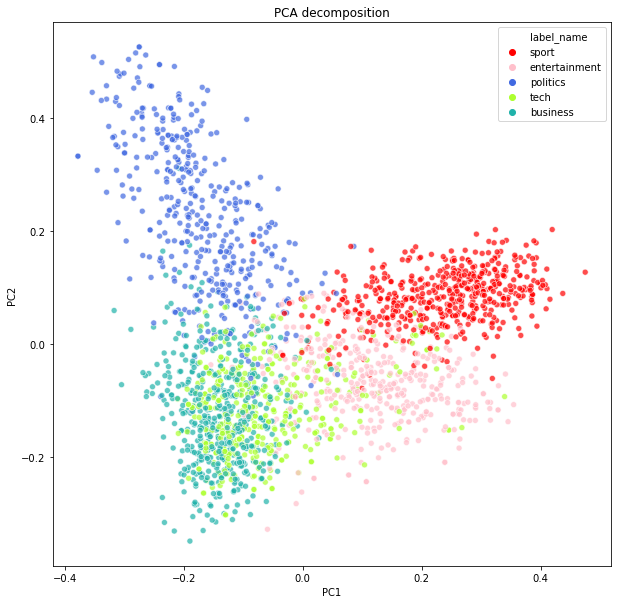

In [17]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

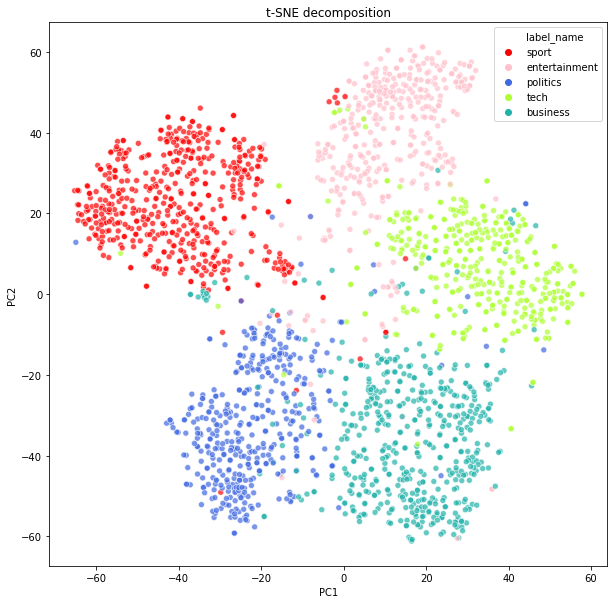

In [18]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

In [19]:
df_models.sort_values('Test Set Accuracy', ascending = False)

,Model,Training Set Accuracy,Test Set Accuracy
6,Gradient Boosting,1.000000,0.961078
1,Multinomial Naïve Bayes,0.951877,0.955090
2,Random Forest,1.000000,0.952096
4,Logistic Regression,0.976732,0.952096
3,SVM,0.964040,0.949102
5,KNN Classifier,0.960867,0.946108
